In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from msresist.figures.common import TimePointFoldChange

matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

### Cell Confluency of DTP cells

In [2]:
path = "/home/marcc/AXLomics/msresist/data/Validations/DTP/"
phase_files = []
red_files = []
for subf in os.listdir(path):
    path_subf = os.path.join(path, subf)
    for f in os.listdir(path_subf):
        dtp = pd.read_csv(os.path.join(path_subf, f)).iloc[:, 1:]
        dtp.columns = [c.split(".")[0] for c in dtp.columns]
        dtp["Elapsed"] = list(dtp["Elapsed"].values / 24)
        dtp_long = pd.melt(dtp, "Elapsed", dtp.columns[1:], "Conditions", "norm signal")
        if subf == "Phase":
            dtp_long = pd.melt(dtp, "Elapsed", dtp.columns[1:], "Conditions", "norm cell confluency")
            dtp_long.insert(1, "Cell Line", [cl.split("-")[0]  for cl in dtp_long["Conditions"]])
            dtp_long.insert(1, "Treatment", [cl.split("-")[1]  for cl in dtp_long["Conditions"]])
            dtp_long = dtp_long.drop("Conditions", axis=1)
            phase_files.append(dtp_long)
        elif subf == "Red":
            dtp_long = pd.melt(dtp, "Elapsed", dtp.columns[1:], "Conditions", "norm YAP signal")
            red_files.append(dtp_long)

DTP_phase = pd.concat(phase_files)
DTP_red = pd.concat(red_files)

In [3]:
er = ["UT", "E", "T", "R", "ER", "ET", "ETR"]
ed = ["UT", "E", "D", "ED", "EDR"]
ex = ["UT", "E", "X", "EX", "EXR"]
tg = [er, ex, ed]

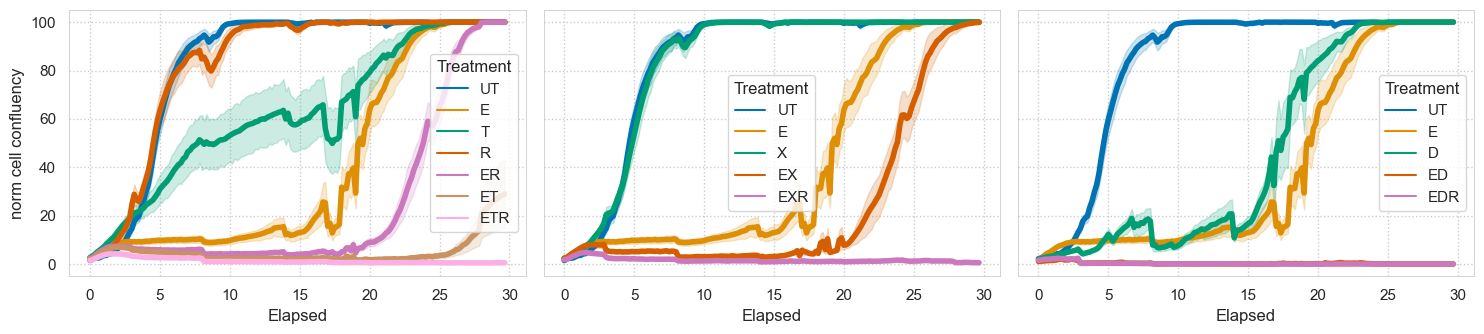

In [4]:
wt = DTP_phase[DTP_phase["Cell Line"] == "WT"].set_index("Treatment")

fig, ax = plt.subplots(1, 3, figsize=(15, 3.5), sharey=True)
for i, t in enumerate(tg):
    sns.lineplot(wt.loc[t], x="Elapsed", hue="Treatment", y="norm cell confluency", errorbar=('ci', 68), ax=ax[i], linewidth=4)
plt.tight_layout()
plt.savefig("WT_DTP.svg")

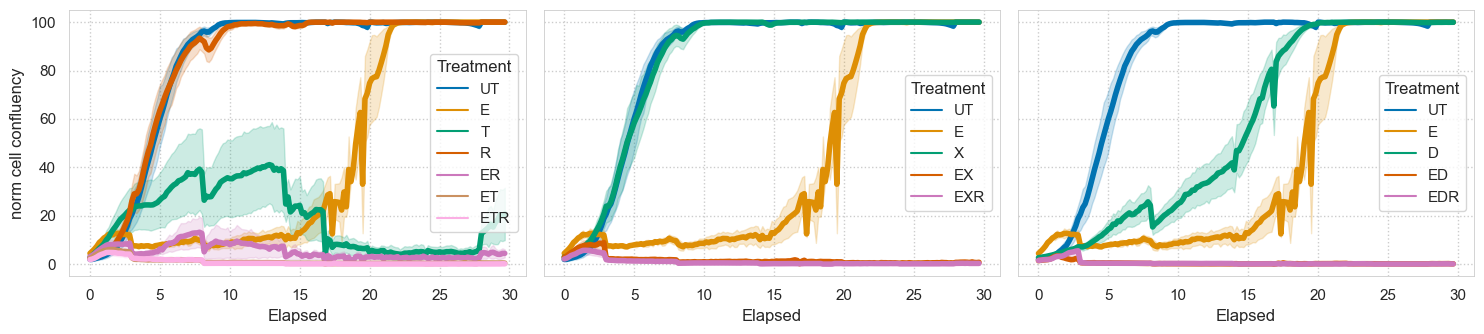

In [5]:
axl_ko = DTP_phase[DTP_phase["Cell Line"] == "AXL KO"].set_index("Treatment")

fig, ax = plt.subplots(1, 3, figsize=(15, 3.5), sharey=True)
for i, t in enumerate(tg):
    sns.lineplot(axl_ko.loc[t], x="Elapsed", hue="Treatment", y="norm cell confluency", errorbar=('ci', 68), ax=ax[i], linewidth=4)
plt.tight_layout()
plt.savefig("KO_DTP.svg")

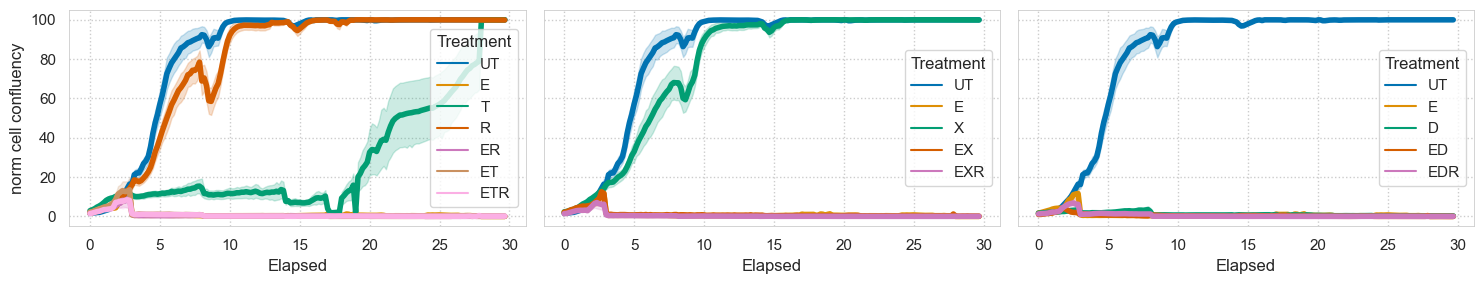

In [6]:
yap_ko = DTP_phase[DTP_phase["Cell Line"] == "YAP KO"].set_index("Treatment").dropna()

fig, ax = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
for i, t in enumerate(tg):
    sns.lineplot(yap_ko.loc[t], x="Elapsed", hue="Treatment", y="norm cell confluency", errorbar=('ci', 68), ax=ax[i], linewidth=4)
plt.tight_layout()
plt.savefig("YAPKO_DTP.svg")

### YAP signal of DTP cells

In [7]:
er = ["UT", "E", "EA", "R", "ER"]
et = ["UT", "E", "T", "ET", "ETR"]
tg = [er, et, ed, ex]

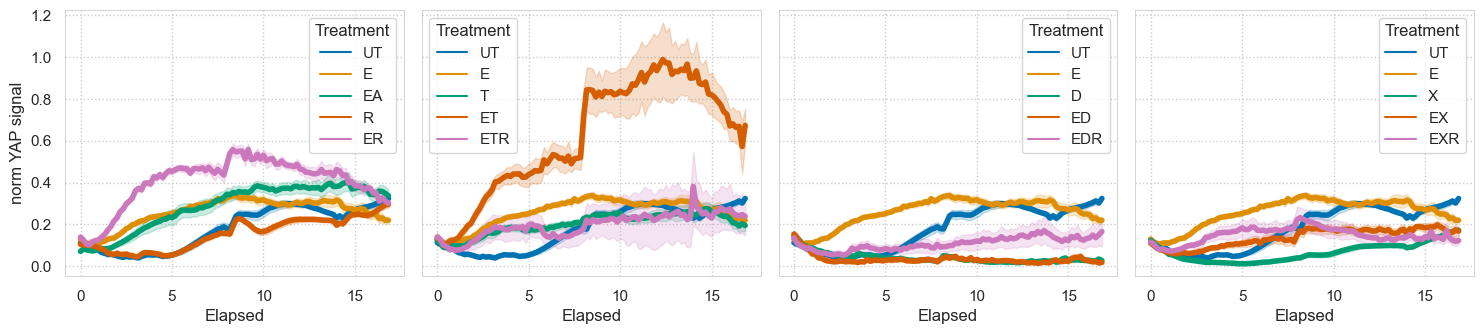

In [8]:
yap = DTP_red.rename(columns={"Conditions": "Treatment"}).set_index("Treatment").dropna()

fig, ax = plt.subplots(1, 4, figsize=(15, 3.5), sharey=True)

for i, t in enumerate(tg):
    yap = yap[yap["Elapsed"] < 17]
    sns.lineplot(yap.loc[t], x="Elapsed", hue="Treatment", y="norm YAP signal", errorbar=('ci', 68), ax=ax[i], linewidth=4)
plt.tight_layout()
plt.savefig("yap_signal.svg")